## Movie similiarity recomendation model

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [6]:
columns_names = ['user_id','item_id', 'rating','timestamp']

In [8]:
df = pd.read_csv('u.data' ,sep='\t', names=columns_names)

In [12]:
df.head()

,user_id,item_id,rating,timestamp
0,0 50 5 881250949,NaN,NaN,NaN
1,0 172 5 881250949,NaN,NaN,NaN
2,0 133 1 881250949,NaN,NaN,NaN
3,196,242.0,3.0,881250949.0
4,186,302.0,3.0,891717742.0


In [13]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [14]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
df = pd.merge(df, movie_titles,on='item_id')

In [17]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242.0,3.0,881250949.0,Kolya (1996)
1,63,242.0,3.0,875747190.0,Kolya (1996)
2,226,242.0,5.0,883888671.0,Kolya (1996)
3,154,242.0,3.0,879138235.0,Kolya (1996)
4,306,242.0,5.0,876503793.0,Kolya (1996)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.set_style('white')

In [20]:
%matplotlib inline

In [23]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()  # Mean Rating of each title in descending.

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [26]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [27]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [29]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [32]:
ratings['num_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [33]:
ratings

,rating,num_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<AxesSubplot:>

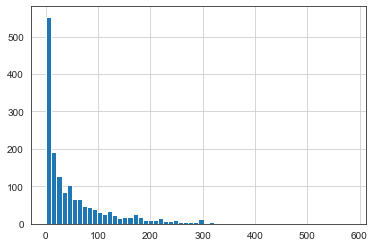

In [36]:
ratings['num_ratings'].hist(bins=60)

<AxesSubplot:>

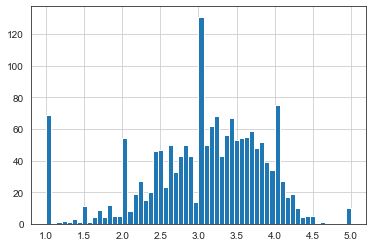

In [38]:
ratings['rating'].hist(bins=60)

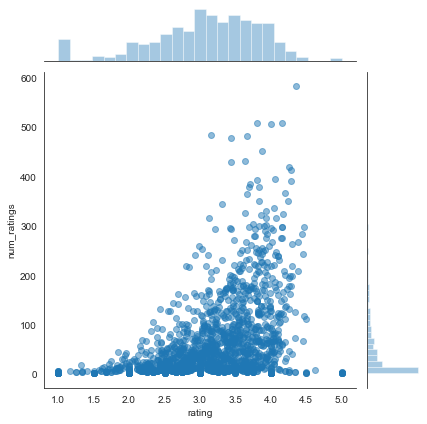

In [42]:
sns.jointplot(data= ratings, x='rating',y='num_ratings', alpha= 0.5)

In [44]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242.0,3.0,881250949.0,Kolya (1996)
1,63,242.0,3.0,875747190.0,Kolya (1996)
2,226,242.0,5.0,883888671.0,Kolya (1996)
3,154,242.0,3.0,879138235.0,Kolya (1996)
4,306,242.0,5.0,876503793.0,Kolya (1996)


In [45]:
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')

In [46]:
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
10,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,5.0,NaN,NaN,4.0,3.0,NaN,NaN,...,NaN,NaN,NaN,4.0,4.0,2.0,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
ratings.sort_values('num_ratings', ascending=False).head(10)

,rating,num_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [53]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']

In [54]:
liarliar_user_ratings = movie_matrix['Liar Liar (1997)']

In [56]:
starwars_user_ratings

user_id
1      5.0
10     5.0
100    NaN
101    4.0
102    4.0
      ... 
95     5.0
96     5.0
97     5.0
98     NaN
99     5.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [61]:
similiar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)

In [62]:
similiar_to_liarliar = movie_matrix.corrwith(liarliar_user_ratings)

In [65]:
corr_starwars = pd.DataFrame(similiar_to_starwars, columns= ['Correlation'])
corr_starwars.dropna(inplace=True)

In [68]:
corr_starwars.sort_values('Correlation', ascending=False)

,Correlation
title,
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [70]:
corr_starwars = corr_starwars.join(ratings['num_ratings'])

In [72]:
corr_starwars.head()

,Correlation,num_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [77]:
corr_starwars[corr_starwars['num_ratings'] > 100].sort_values('Correlation', ascending=False)

,Correlation,num_ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [78]:
corr_liarliar = pd.DataFrame(similiar_to_liarliar, columns=['Correlation'])

In [80]:
corr_liarliar.dropna(inplace=True)

In [81]:
corr_liarliar = corr_liarliar.join(ratings['num_ratings'])

In [84]:
corr_liarliar[corr_liarliar['num_ratings']>50].sort_values('Correlation', ascending=False)

,Correlation,num_ratings
title,,
Liar Liar (1997),1.000000,485
Casper (1995),0.538816,52
Batman & Robin (1997),0.532858,62
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91
...,...,...
Around the World in 80 Days (1956),-0.281599,59
Raging Bull (1980),-0.308129,116
"Thin Man, The (1934)",-0.346086,60
